<a href="https://colab.research.google.com/github/rickrdoo/MODELO_IA_CANCER-DE-MAMA-/blob/main/Modelo_Cancer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

======1. Cargando y explorando los datos ===

Primeras 5 filas de dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal d

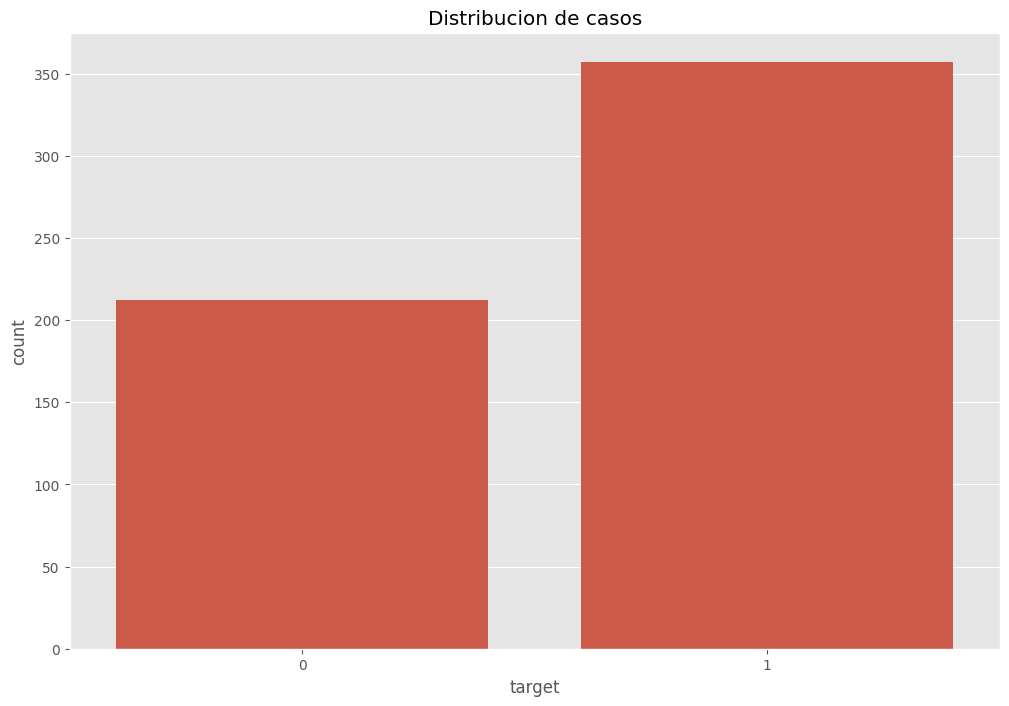

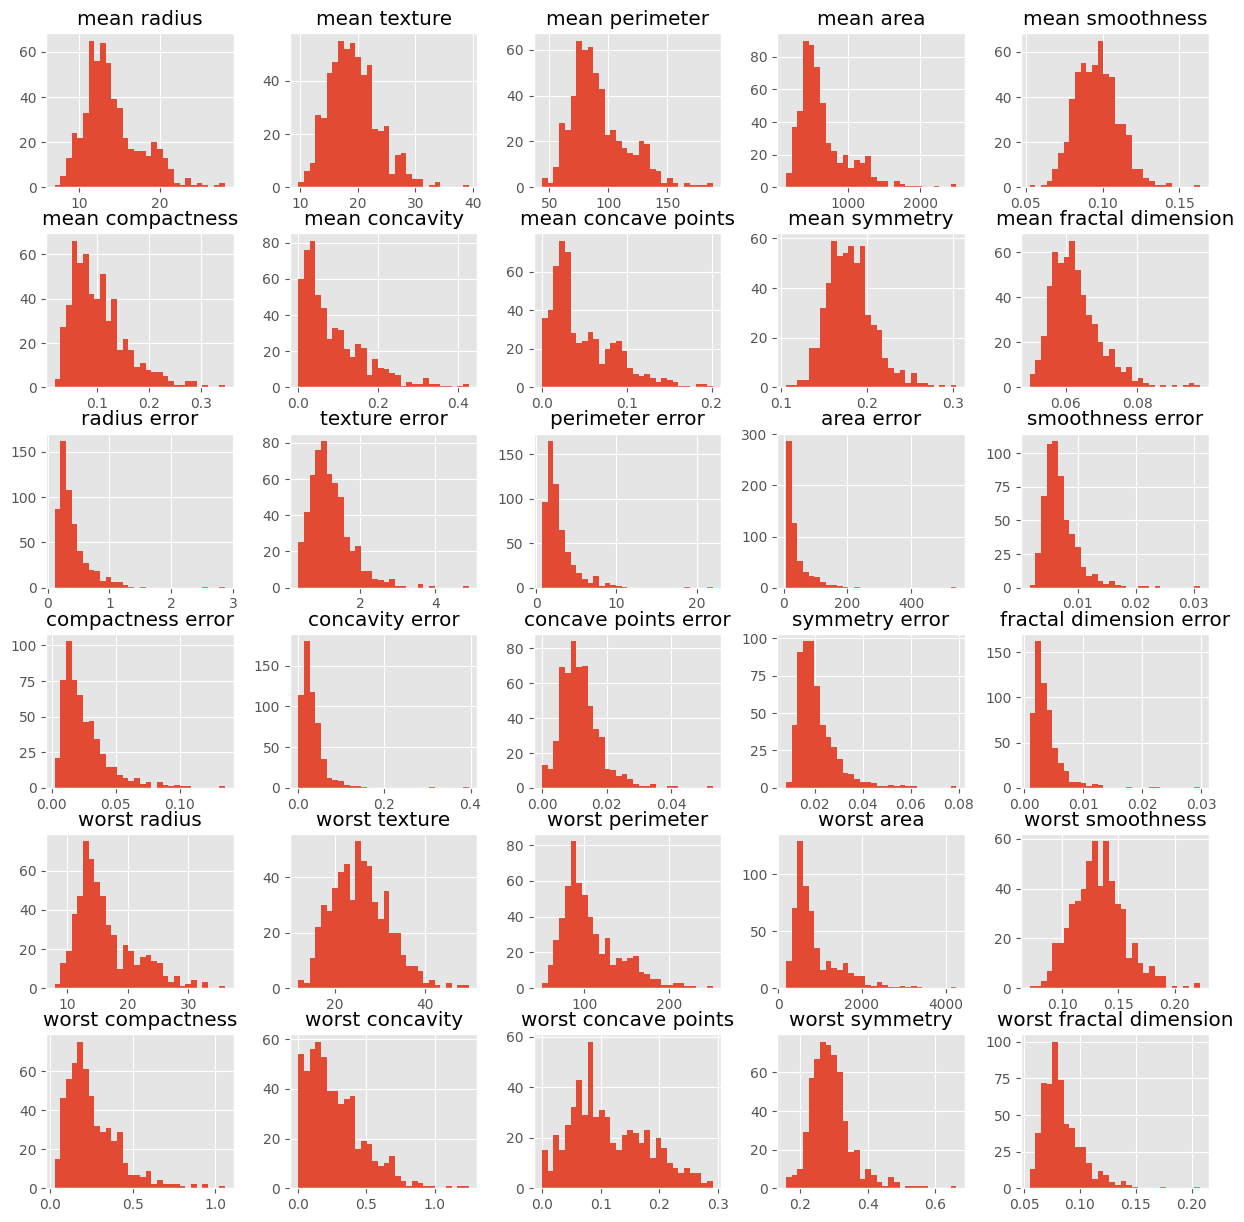

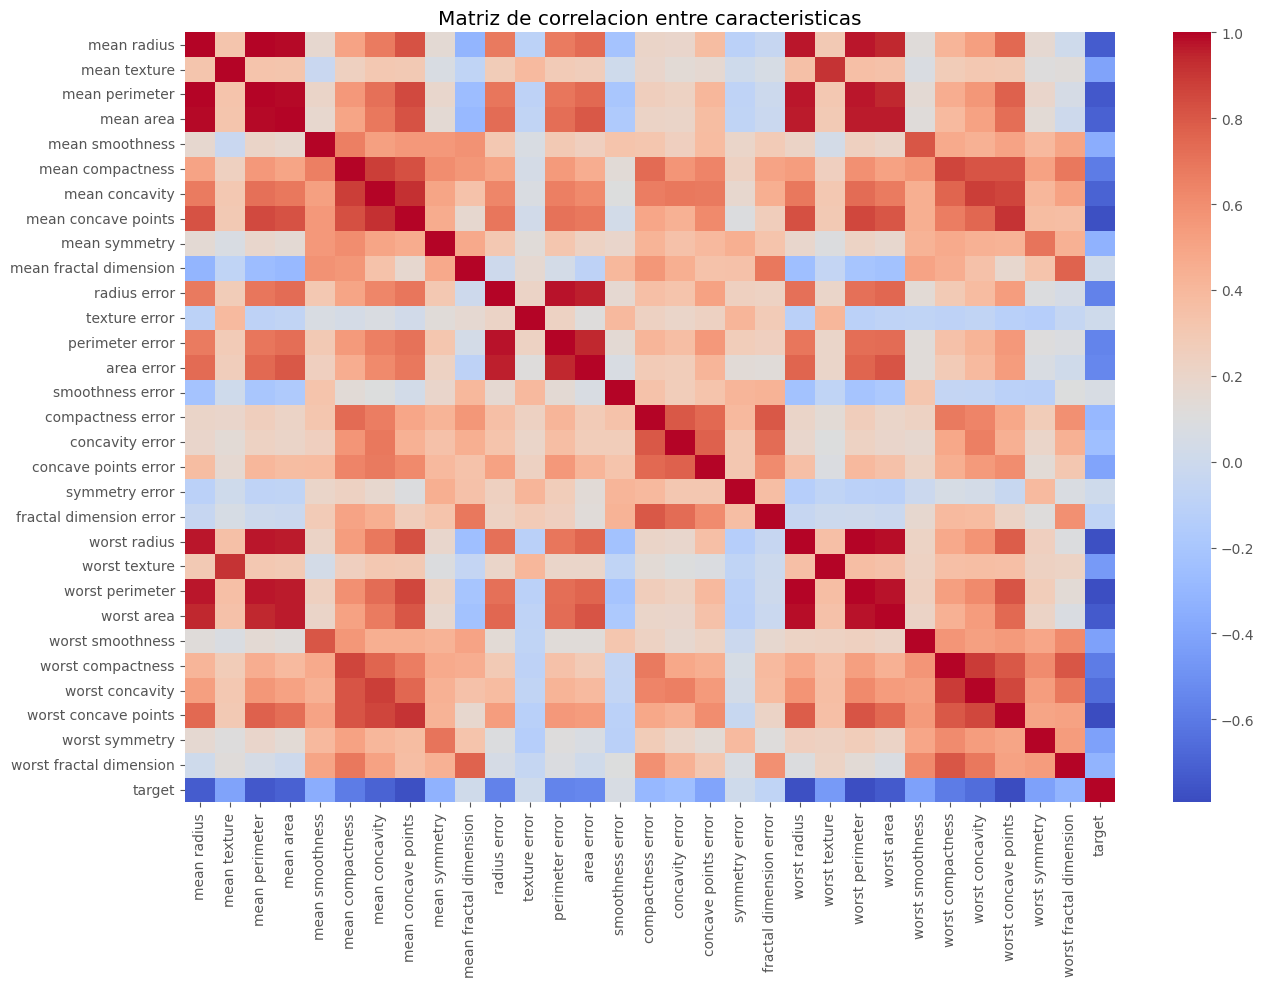


===3. Preprocesamiento de datos===
===SALIDAS===
\Forma de los datos de entrenamiento: (398, 30)
Forma de los datos de prueba: (171, 30)

===4. Modelo de entrenamiento===

===5. Evaluacion del modelo===

Reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        66
           1       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


Matriz de confusion:


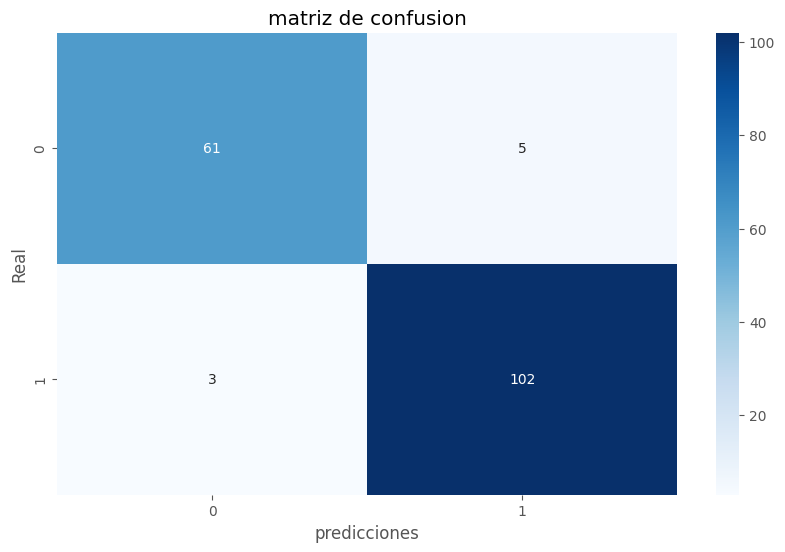


Precision del modelo: 0.9532163742690059

===6. Predicciones===


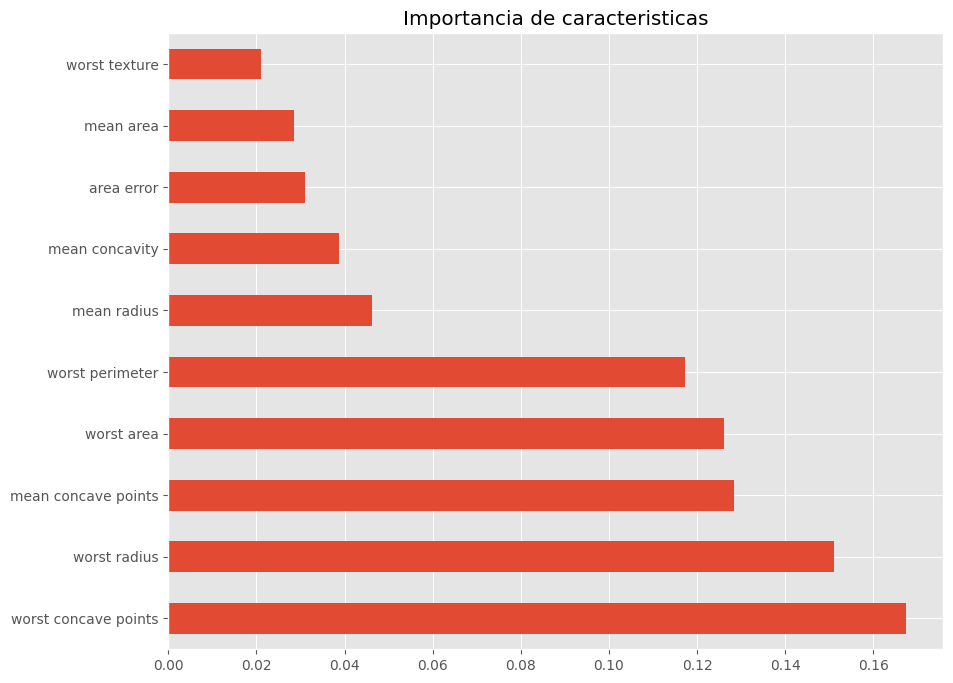


==7. prediccion de ejemplo
Prediccion: beningo
Etiqueta real: Benigno


In [ ]:
#           ////LABORATORIO RED NEURONAL _ CANCER DE MAMA
#ALGORITMO DE CLASIFICACION
#IMPORTACION DE LIBRARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#_______________________________________________
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

#_______________________________________________
#CONFIGURR ESTILOS DE GRAFICOS
plt.style.use('ggplot')
%matplotlib inline

#_______________________________________________
#CARGAR Y EXPLORAR DATOS
print("======1. Cargando y explorando los datos ===")
data = load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("\nPrimeras 5 filas de dataset:")
print(df.head())
print("\nInformacion del dataset:")
print(df.info())
print("\nEstadisticas descriptivas:")
print(df.describe())

#_______________________________________________
#VISUALIZACION DE DATOS
print("\n===2. Visualizacion de datos===")
plt.figure(figsize=(12,8))
sns.countplot(x='target', data=df)
plt.title('Distribucion de casos')
plt.show()

#_______________________________________________
#HISTOGRAMA DE LAS CARACTERISTICAS
df.drop('target', axis=1).hist(bins=30, figsize=(15,15))
plt.show()

#_______________________________________________
#MATRIZ DE CORRELACION
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de correlacion entre caracteristicas')
plt.show()

#______________________________________________
#PREPOCESAMIENTO
print("\n===3. Preprocesamiento de datos===")
x=df.drop('target', axis=1)
y=df['target']

#______________________________________________
#DIVIDIR EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#______________________________________________
#ESTANDARIZAR LOS DATOS
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print('===SALIDAS===')
print(f"\Forma de los datos de entrenamiento: {x_train.shape}")
print(f"Forma de los datos de prueba: {x_test.shape}")

#______________________________________________
#MODELO DE ENTRENAMIENTO
print("\n===4. Modelo de entrenamiento===")
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(x_train, y_train)

#______________________________________________
#EVALUACION DEL MODELO
print("\n===5. Evaluacion del modelo===")
y_pred = model.predict(x_test)
print("\nReporte de clasificacion:")
print(classification_report(y_test, y_pred))

#______________________________________________
#las matrices de confusion son herramientas escenciales en el
#aprendizage automatico, especialmente para evaluar el rendimiento
#de un modelo de clasificacion. Permiten visualizar y analizar la precision
#y la exceptividad del modelo en diferentes clases.
#______________________________________________

print("\nMatriz de confusion:")
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('matriz de confusion')
plt.xlabel('predicciones')
plt.ylabel('Real')
plt.show()
#______________________________________________
print(f"\nPrecision del modelo: {accuracy_score(y_test, y_pred)}")

#_____________________________________________
print("\n===6. Predicciones===")
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
plt.title('Importancia de caracteristicas')
plt.show()

#______________________________________________
#PREDICCIONES O MUESTREO "PREDICCION DE EJEMPLO"
print("\n==7. prediccion de ejemplo")
sample = x_test[0].reshape(1,-1)
prediccion=model.predict(sample)
print(f"Prediccion: {'beningo' if prediccion[0]==1 else 'Malingno'}")
print(f"Etiqueta real: {'Benigno' if y_test.iloc[0] == 1 else 'Malingo'}")







# Explicacion del codigo:

* Librerias utilizadas en la codificacion

1. numpy/panda: Manipulacion de datos.
2. matplotilib/seaborn: Visualizacion.
3. sickit-learn: Machine learning binaria
4. Dataset: usamos el dataset de cancer de mama de wisconsin
* 30 caracteristicas numericas
* variables objetivo binaria (0:maligno, 1; benigno)
## Visualizaciones incluidas
1. Distribucion de clases objetivo
2. Histogramas de todas las caracteristicas
3. Matriz de correlacion entre caracteristicas
4. Matriz de confusion del modelo
5. Importancia de caracteristicas(Top 10)
### Modelo de machine learning
- **Random Forest:** Algoritmo potente para clasificacion
- **Procesamiento:** Escalado estandar de caracteristicas
- **Evaluacion:** Reporte de clasificacion, precision, matriz de clasificacion.
# **5. como ejecutarlo**
### copia este codigo en un jupyter notebook o script py
### Asegurate de tener instaladas las librerias:
```bash
  pip install numpy
  pip installa pandas
  pip intall matplotlib
  pip install seaborn
  pip intall sickit-learn
```
```
- copia y pega este codigo en tu terminal, o ejecuta celda por celda en tu jupyter o todo el script

# **6. Posibles mejoras**

- Ajuste hiperparametros con GridSearchCV
- Validación cruzada
- Prueba con otros algoritmos (SVM,XGBoost,etc.)
- Analisis mas detallado de caracteristicas

**Este codigo proporciona un flujo complejo de ML con visualizacion profesionales listas para presentciones o informes o informes.**



